## in this notebook we'll check how a conv network learns the features. it will learn to differentiate between a circle and a square

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

In [39]:
transform = transforms.Compose([transforms.Grayscale(),
                                transforms.RandomRotation(20),
                              transforms.Resize((48,48)),
                                transforms.RandomResizedCrop((48,48),scale=(0.3,1.0)),
                              transforms.ToTensor()])

In [40]:
traindataset = ImageFolder(root='data/', transform=transform)

In [41]:
samp = next(iter(traindataset))[0]
samp

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

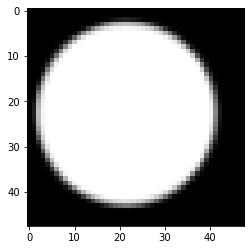

In [42]:
samp = next(iter(traindataset))[0]
plt.imshow(samp[0], cmap='gray')

In [43]:
traindataset.classes

['circle', 'square']

In [44]:
trainloader = DataLoader(traindataset, 1, shuffle=True)

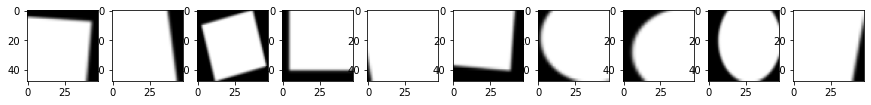

In [45]:
plt.figure(figsize=(15,7))
for i in range(10):
    plt.subplot(1,10,i+1)
    samp = next(iter(trainloader))[0][0][0]
    plt.imshow(samp, cmap='gray')

In [46]:
from torch import nn
import torch.nn.functional as F
from torch import optim

In [84]:
class CircleOrSquare(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,10,3)
        self.conv2 = nn.Conv2d(10,10,3)
        self.conv3 = nn.Conv2d(10,10,3)
        self.conv4 = nn.Conv2d(1,1,3)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(10 * 4 * 4, 2)
        
    def forward(self, x):
        x = F.relu(self.pool(self.conv1(x)))
        x = F.relu(self.pool(self.conv2(x)))
        x = F.relu(self.pool(self.conv3(x)))
        x = torch.flatten(x, 1)
        x = torch.log_softmax(self.fc1(x), dim=1)
        
        return x

In [85]:
model = CircleOrSquare()

In [86]:
model

CircleOrSquare(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=160, out_features=2, bias=True)
)

In [87]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters())

In [88]:
# parameters
epochs = 10000

In [89]:
trainloader = DataLoader(traindataset, 1, shuffle=True)

In [90]:
running_loss = []
print_every = 1000
for e in range(epochs):
    for i,(images,labels) in enumerate(trainloader):
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss.append(loss.item())
    if e % print_every == 0:
        print(f'epoch: {e}, loss: {loss.item()}')

epoch: 0, loss: 0.6509763598442078
epoch: 1000, loss: 1.1301982402801514
epoch: 2000, loss: 0.2223128378391266
epoch: 3000, loss: 0.5035838484764099
epoch: 4000, loss: 1.4781842764932662e-05
epoch: 5000, loss: 0.20993848145008087
epoch: 6000, loss: 7.152555099310121e-07
epoch: 7000, loss: 0.0002865380665753037
epoch: 8000, loss: 0.0006156456656754017
epoch: 9000, loss: 0.0


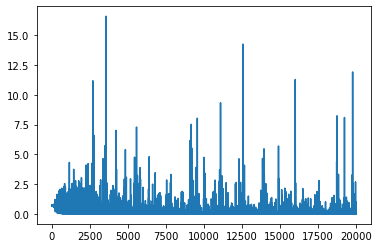

In [72]:
plt.plot(np.arange(len(running_loss)), running_loss)

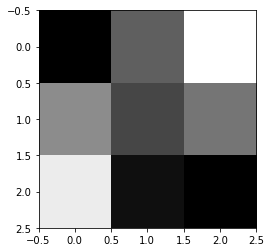

In [83]:
plt.imshow(model.conv1.weight.detach().numpy()[3][0], cmap='gray')

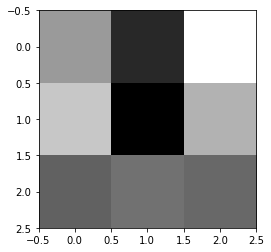

In [79]:
plt.imshow(model.conv2.weight.detach().numpy()[0][0], cmap='gray')

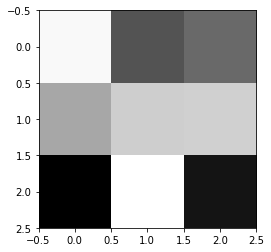

In [64]:
plt.imshow(model.conv3.weight.detach().numpy()[0][0], cmap='gray')